In [51]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [42]:
# Load Dataset
df = pd.read_csv("large_sample_tweets.csv", encoding="latin1")

# Display dataset info
print(df.info())

# Display first 5 rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   100 non-null    object
 1   Username   100 non-null    object
 2   Tweet      100 non-null    object
 3   Date       100 non-null    object
 4   Retweets   100 non-null    int64 
 5   Likes      100 non-null    int64 
 6   Sentiment  100 non-null    object
dtypes: int64(2), object(5)
memory usage: 5.6+ KB
None


,Tweet_ID,Username,Tweet,Date,Retweets,Likes,Sentiment
0,TW1,user_1,I love the new iPhone! The camera quality is a...,2023-01-01,202,784,Positive
1,TW2,user_2,The food at this restaurant was terrible. Neve...,2023-01-02,470,282,Positive
2,TW3,user_3,Just watched a great movie. Highly recommend it!,2023-01-03,323,538,Positive
3,TW4,user_4,The new software update is so buggy. Disappoin...,2023-01-04,94,669,Positive
4,TW5,user_5,Had an average experience at the hotel. Nothin...,2023-01-05,144,369,Positive


In [43]:
# Load stopwords
stop_words = set(stopwords.words("english"))

# Function to clean tweets
def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+|\#", "", text)  # Remove mentions & hashtags
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text.strip()

# Apply cleaning function
df["Clean_Tweet"] = df["Tweet"].apply(clean_tweet)

# Display cleaned tweets
df[["Tweet", "Clean_Tweet"]].head()

,Tweet,Clean_Tweet
0,I love the new iPhone! The camera quality is a...,love new iphone camera quality amazing apple
1,The food at this restaurant was terrible. Neve...,food restaurant terrible never coming back
2,Just watched a great movie. Highly recommend it!,watched great movie highly recommend
3,The new software update is so buggy. Disappoin...,new software update buggy disappointed
4,Had an average experience at the hotel. Nothin...,average experience hotel nothing special


In [44]:
# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Apply VADER & TextBlob Sentiment Analysis
df["VADER_Score"] = df["Clean_Tweet"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["TextBlob_Polarity"] = df["Clean_Tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Assign Sentiment Labels
def get_sentiment(score):
    return "Positive" if score > 0.05 else "Negative" if score < -0.05 else "Neutral"

df["Sentiment_Label"] = df["VADER_Score"].apply(get_sentiment)

# Display Sentiment Results
df[["Clean_Tweet", "VADER_Score", "TextBlob_Polarity", "Sentiment_Label"]].head()

,Clean_Tweet,VADER_Score,TextBlob_Polarity,Sentiment_Label
0,love new iphone camera quality amazing apple,0.8402,0.412121,Positive
1,food restaurant terrible never coming back,-0.4767,-0.500000,Negative
2,watched great movie highly recommend,0.7841,0.480000,Positive
3,new software update buggy disappointed,-0.4767,-0.306818,Negative
4,average experience hotel nothing special,-0.3089,0.103571,Negative


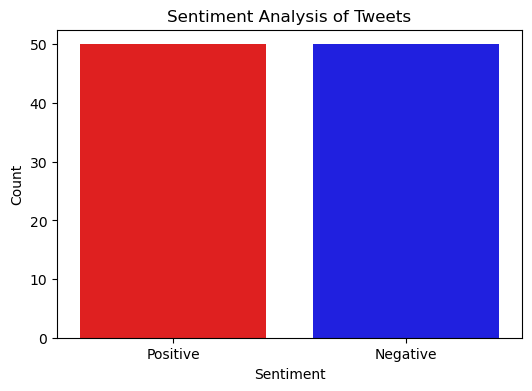

In [45]:
# Count Sentiments
sentiment_counts = df["Sentiment_Label"].value_counts()

# Plot Bar Chart
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["red", "blue", "green"])
plt.title("Sentiment Analysis of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

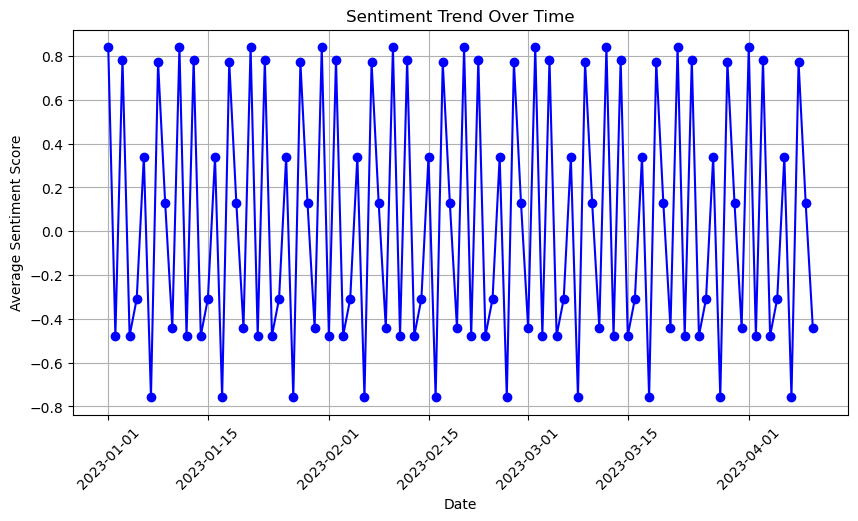

In [46]:
# Convert Date Column to Datetime Format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Aggregate Sentiment Over Time
sentiment_trend = df.groupby(df["Date"].dt.date)["VADER_Score"].mean()

# Plot Sentiment Trend Over Time
plt.figure(figsize=(10,5))
plt.plot(sentiment_trend.index, sentiment_trend.values, marker="o", linestyle="-", color="b")
plt.xticks(rotation=45)
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.grid()
plt.show()

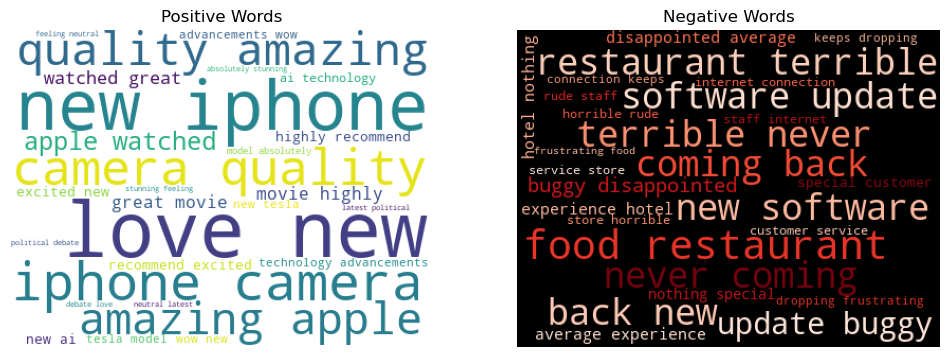

In [47]:
# Separate Positive & Negative Tweets
positive_tweets = " ".join(df[df["Sentiment_Label"] == "Positive"]["Clean_Tweet"])
negative_tweets = " ".join(df[df["Sentiment_Label"] == "Negative"]["Clean_Tweet"])

# Generate Word Cloud
plt.figure(figsize=(12,6))

# Positive Word Cloud
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=400, height=300, background_color="white").generate(positive_tweets))
plt.axis("off")
plt.title("Positive Words")

# Negative Word Cloud
plt.subplot(1,2,2)
plt.imshow(WordCloud(width=400, height=300, background_color="black", colormap="Reds").generate(negative_tweets))
plt.axis("off")
plt.title("Negative Words")

plt.show()

In [48]:
df.to_csv("sentiment_results.csv", index=False)
print("Sentiment results saved as sentiment_results.csv")

Sentiment results saved as sentiment_results.csv
